In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

import calmap
import folium
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [30]:
# Get Data From CSV File
data=pd.read_csv("D:/Projects/Covid_Vs_Food/Data/Food_Supply_Quantity_kg_Data.CSV")
data.drop(data.columns[len(data.columns)-1],axis=1,inplace=True)
data.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.5345,6.7642,40.5645,4.5,29.8,0.009366,0.000279,0.001230,0.007857,38042000.0
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.3261,11.7753,31.2304,22.3,6.2,0.029461,0.001085,0.021169,0.007208,2858000.0
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,1.0310,11.6484,40.3651,26.6,3.9,0.011938,0.001113,0.005352,0.005474,43406000.0
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.6463,2.3041,45.0722,6.8,25,0.000115,0.000006,0.000035,0.000073,31427000.0
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.8102,5.4495,33.3233,19.1,NaN,0.025773,0.003093,0.016495,0.006186,97000.0


In [31]:
data.columns

Index(['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population'],
      dtype='object')

In [32]:
data.isnull().sum().to_frame('nulls')

,nulls
Country,0
Alcoholic Beverages,0
Animal fats,0
Animal Products,0
"Aquatic Products, Other",0
Cereals - Excluding Beer,0
Eggs,0
"Fish, Seafood",0
Fruits - Excluding Wine,0
Meat,0


In [33]:
data = data.fillna(method='ffill')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018472E27C88>,
      dtype=object)

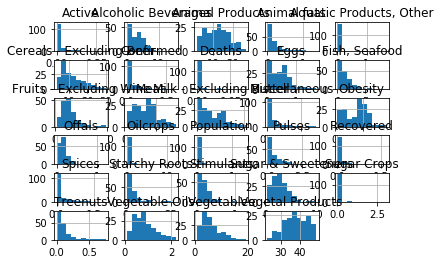

In [34]:
data.hist()

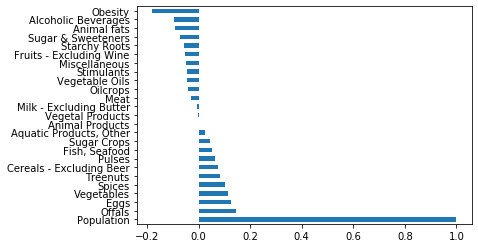

In [35]:
X = data[['Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity','Population']]
Y = data['Confirmed']
x_correlations = X.corr()
x_correlations

(x_correlations
      .Population
      .sort_values(ascending=False)
      .plot
      .barh())

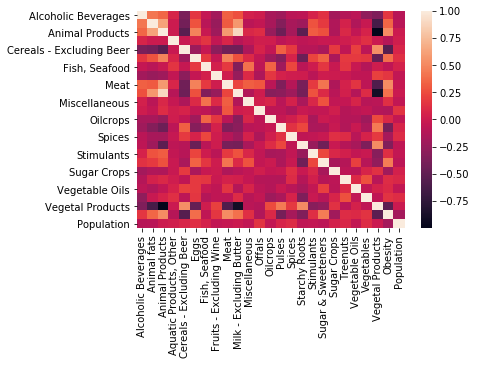

In [36]:
x_heat = sns.heatmap(x_correlations)

In [37]:
X_data = data[['Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products','Obesity']]
    
for y_data in X_data:
    fig = px.area(data,
            x='Confirmed',
            y=y_data,
            template='plotly_white',
            color_discrete_sequence=['blue'],
            title="Confirmed Cases Distribution with "+str(y_data)
           )

    fig.update_yaxes(range=[0,2])
    fig.show()
    
    


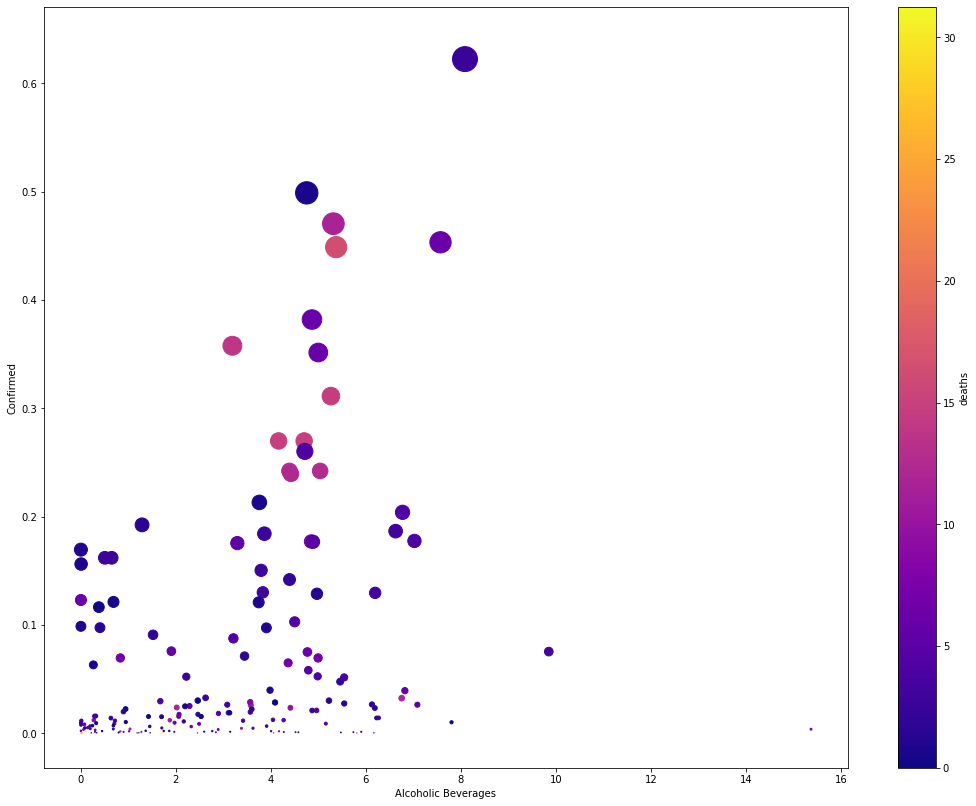

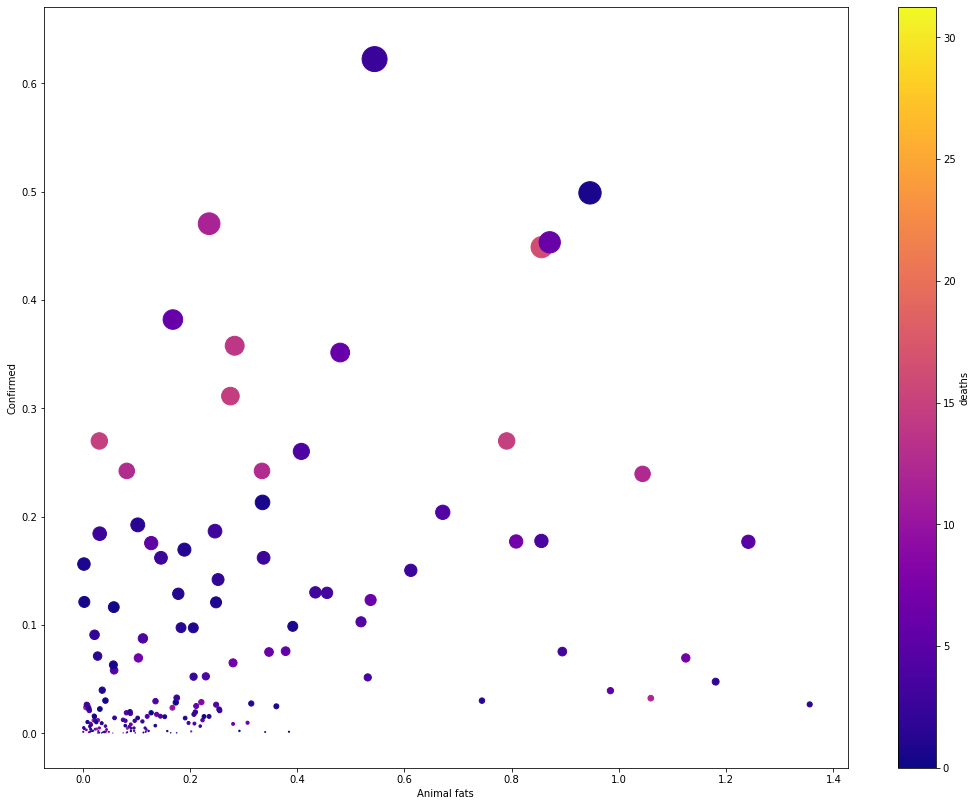

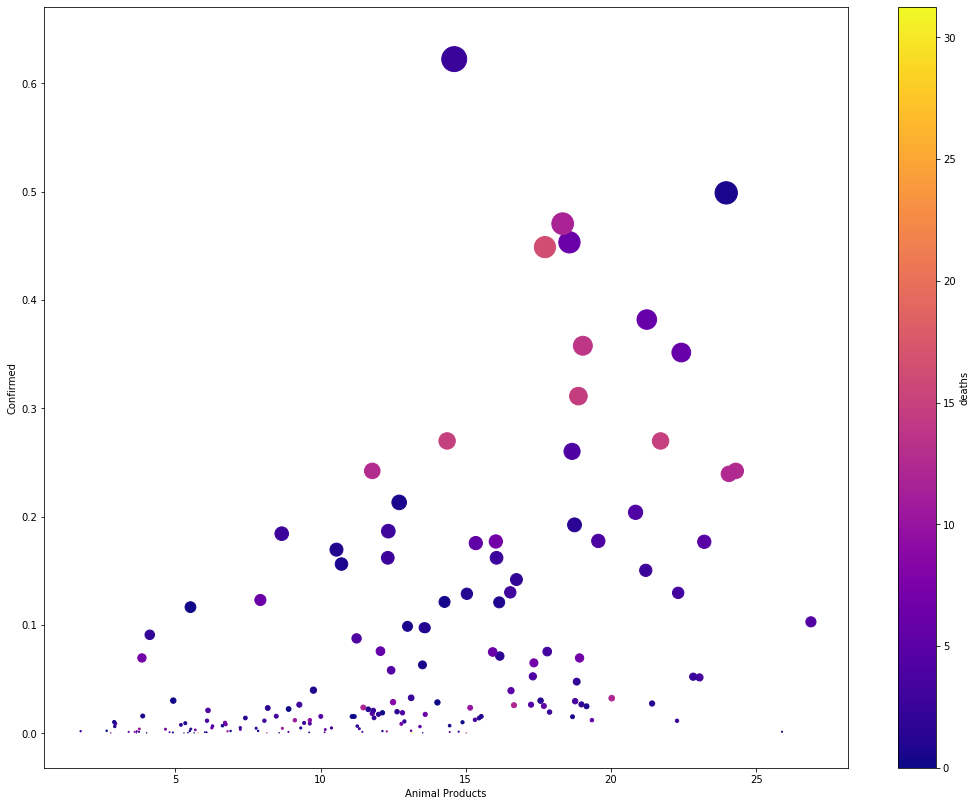

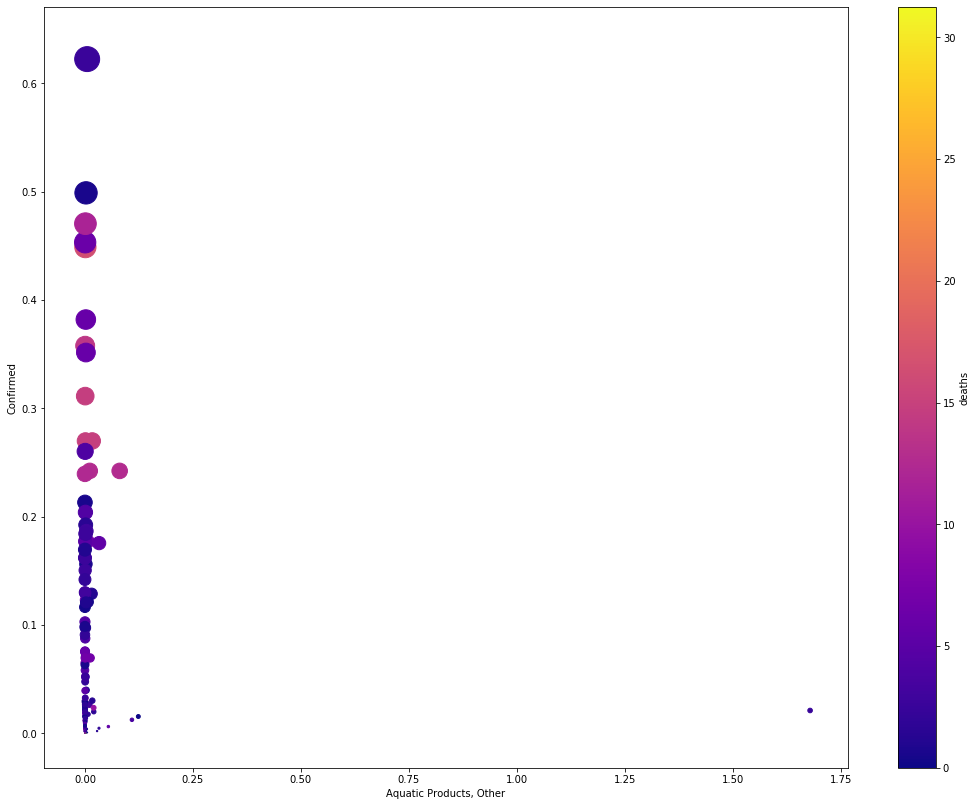

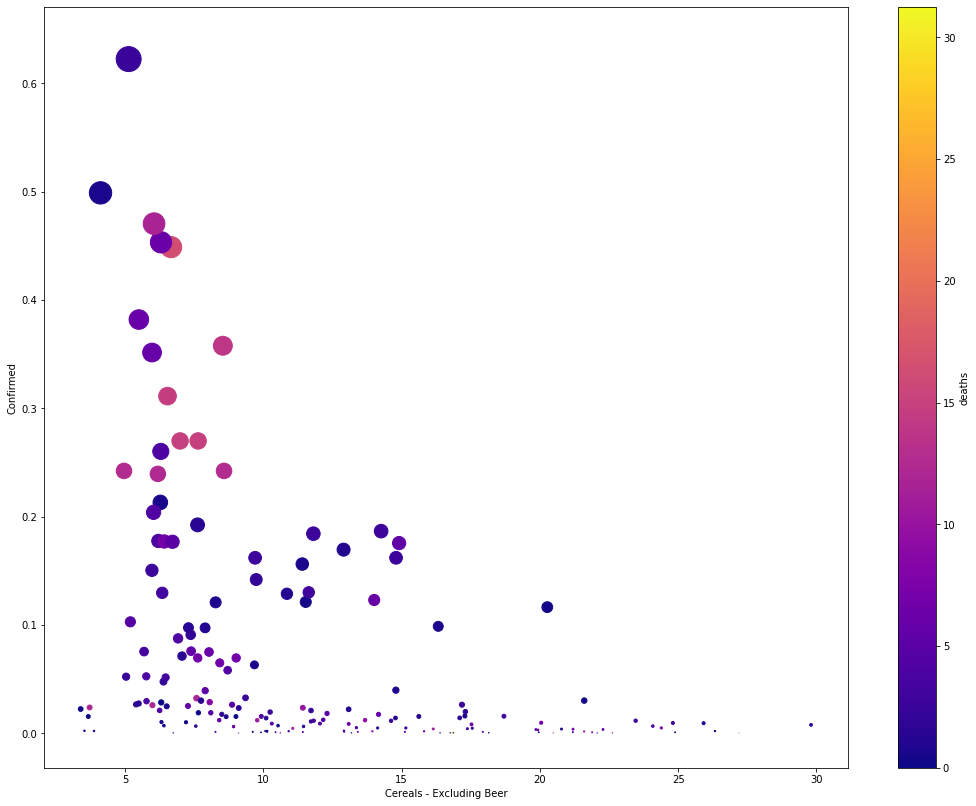

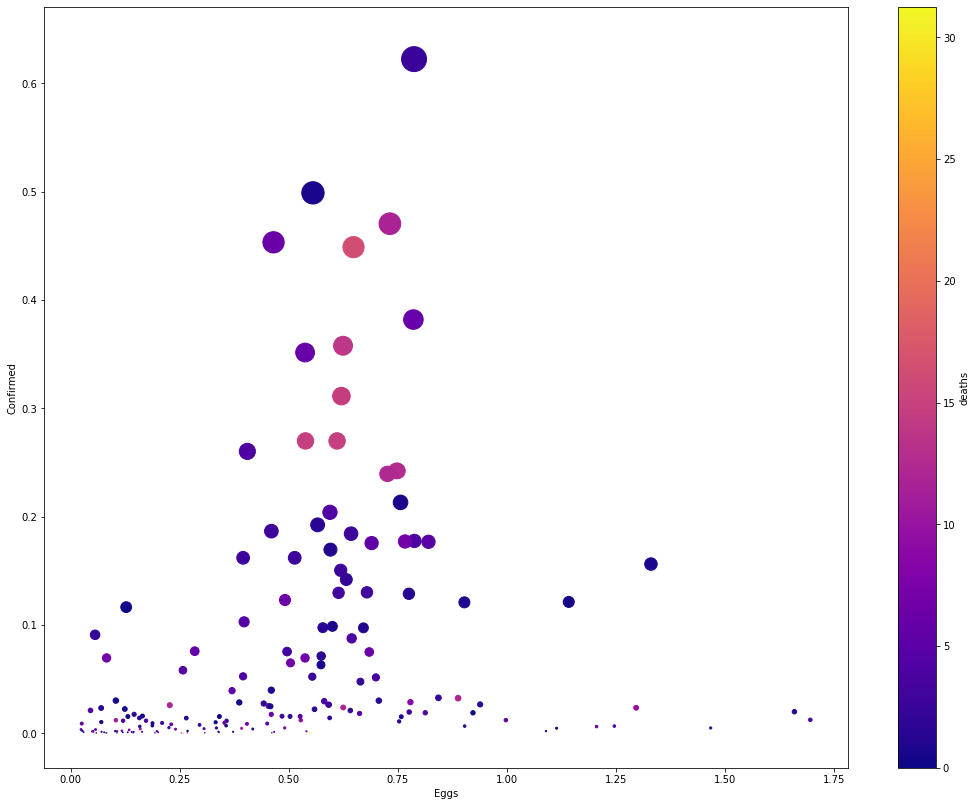

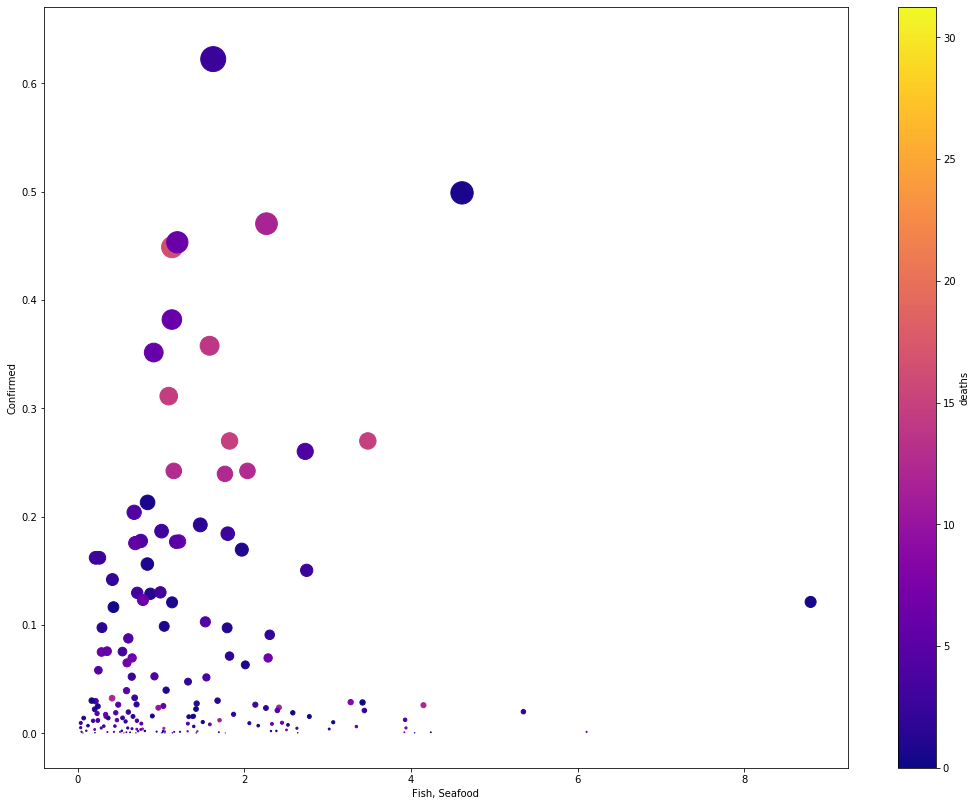

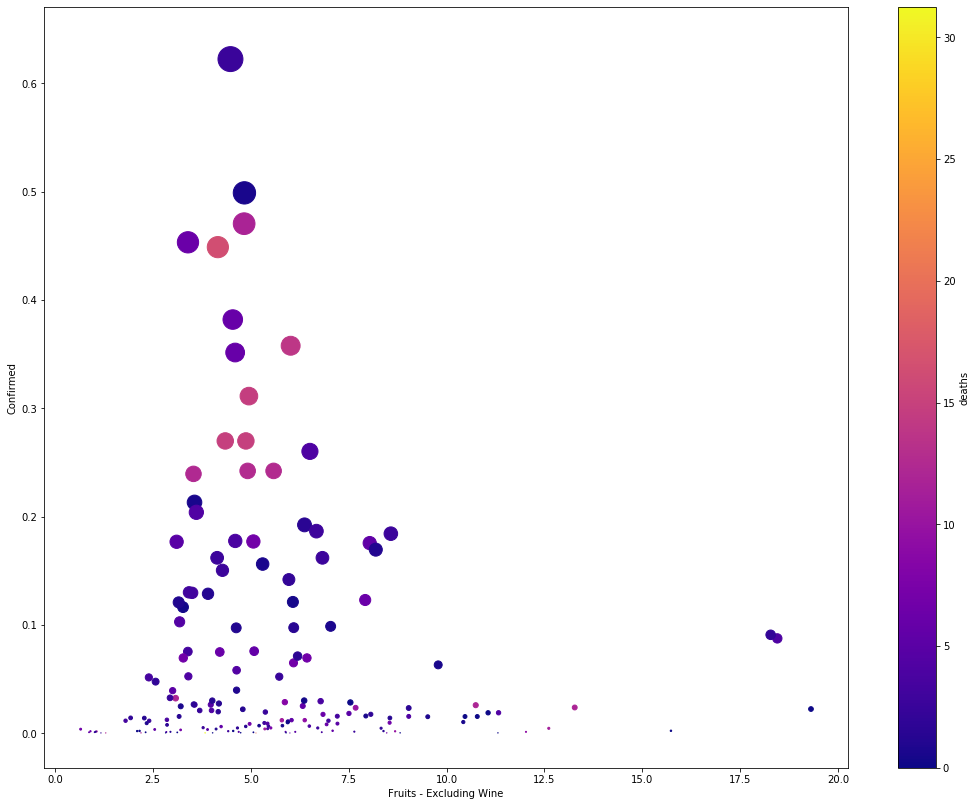

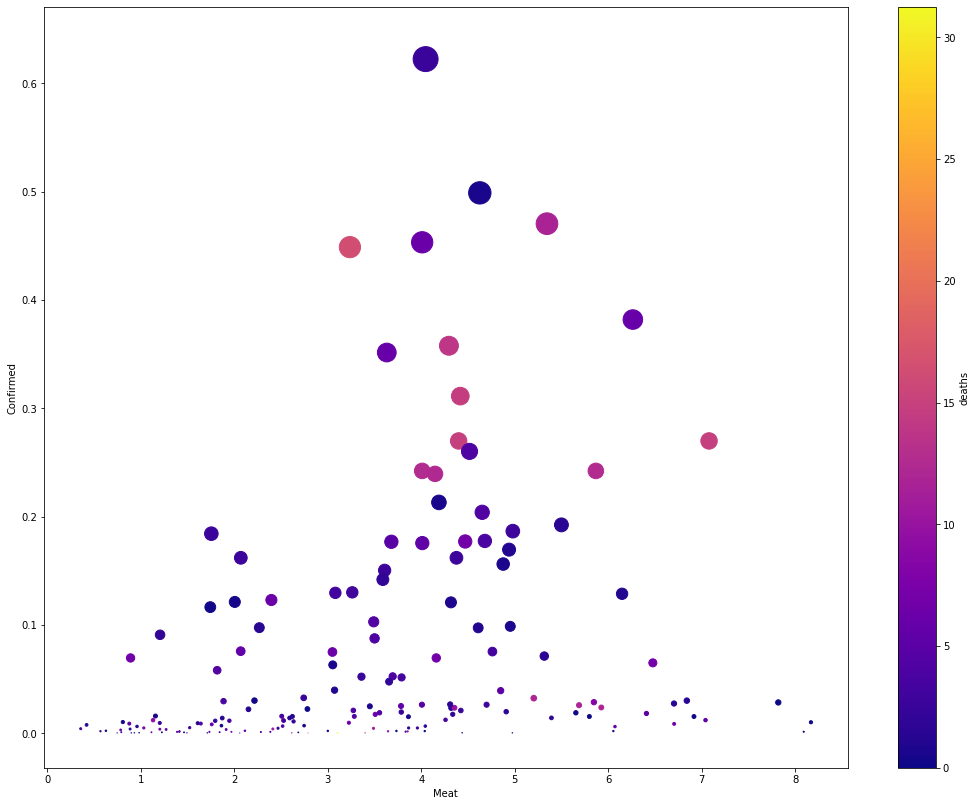

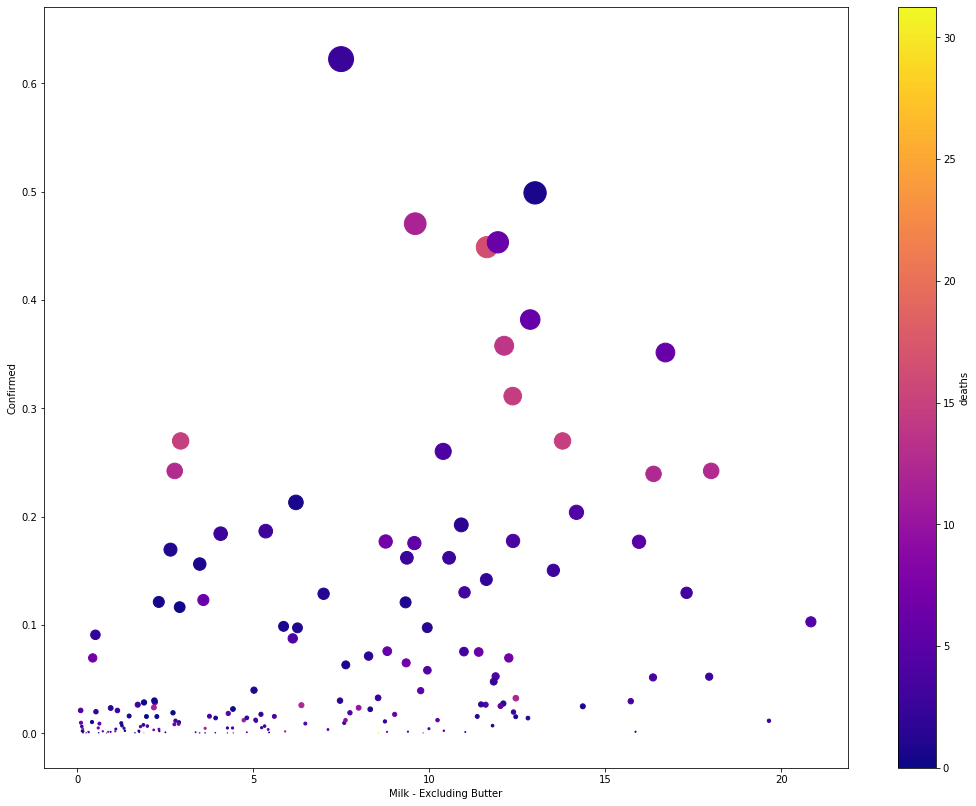

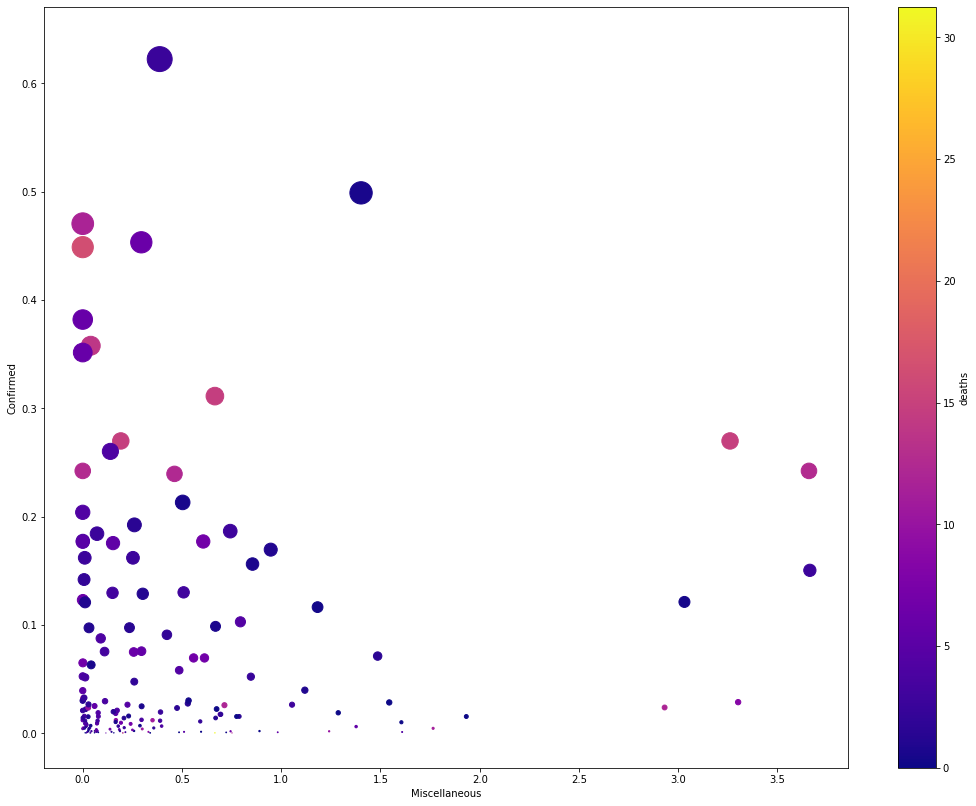

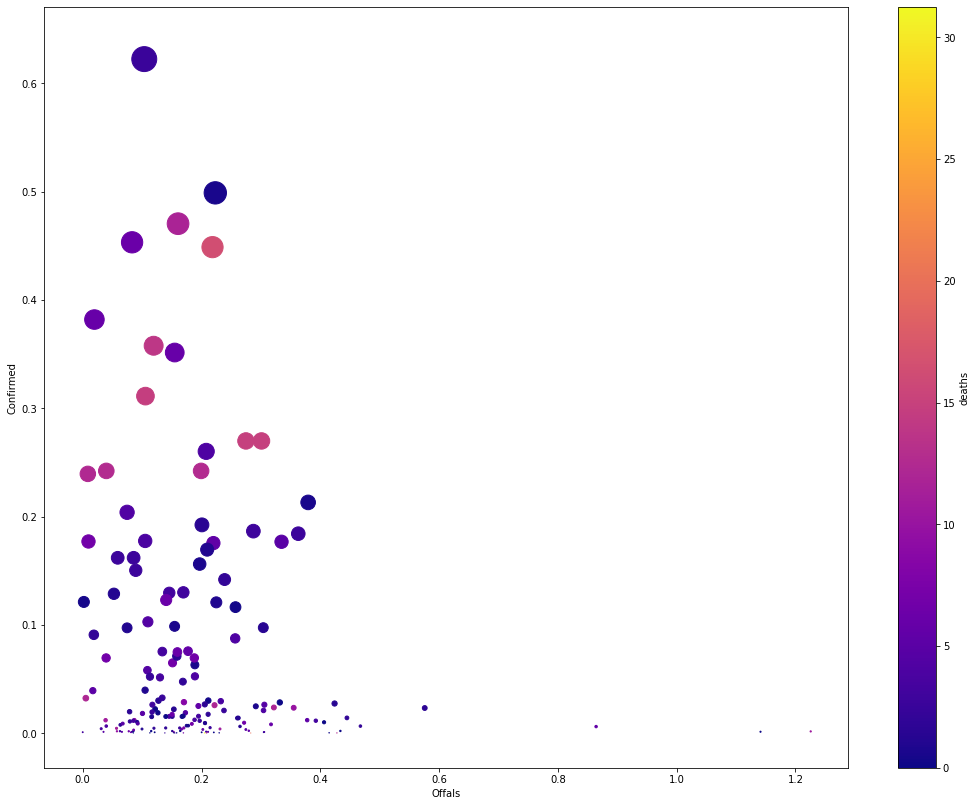

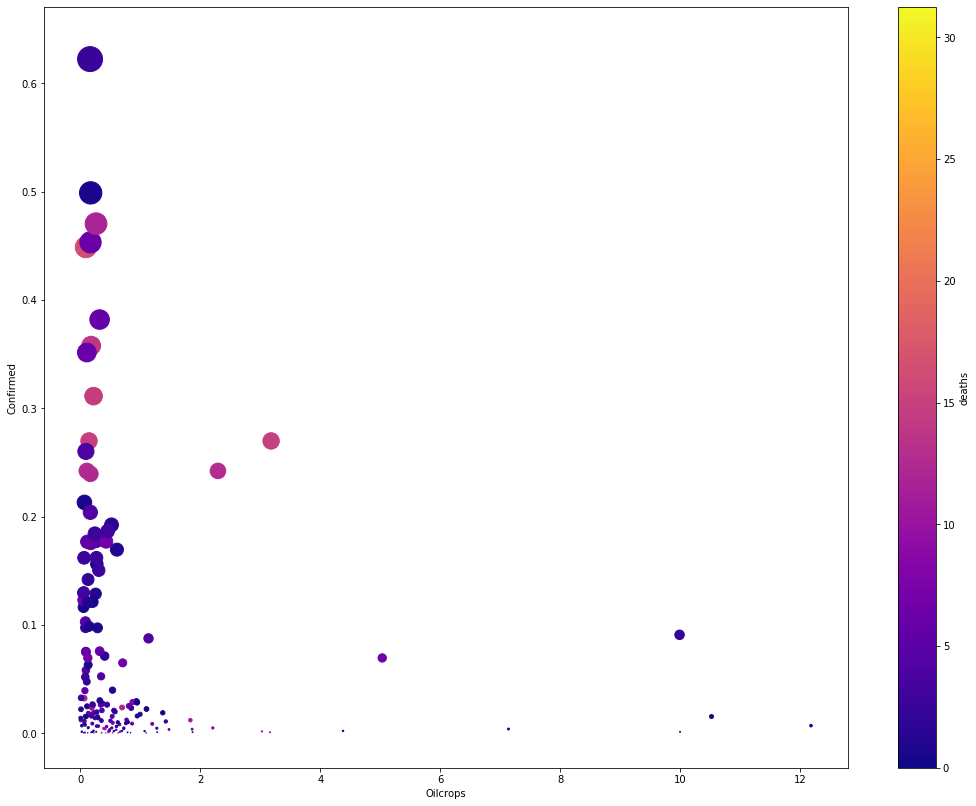

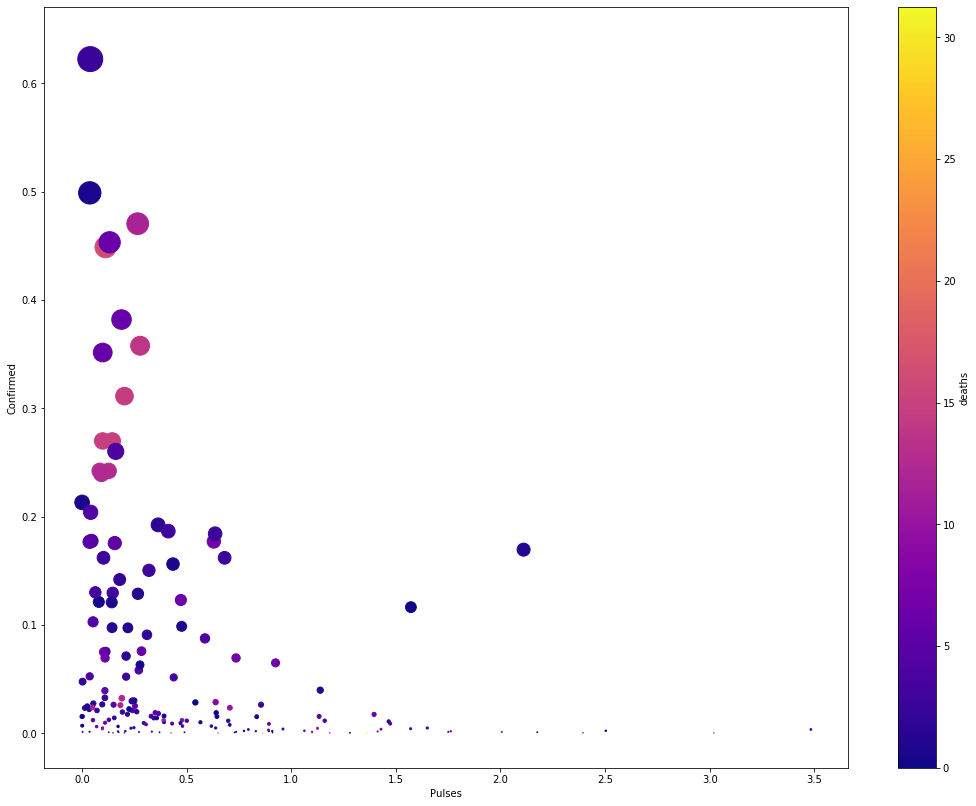

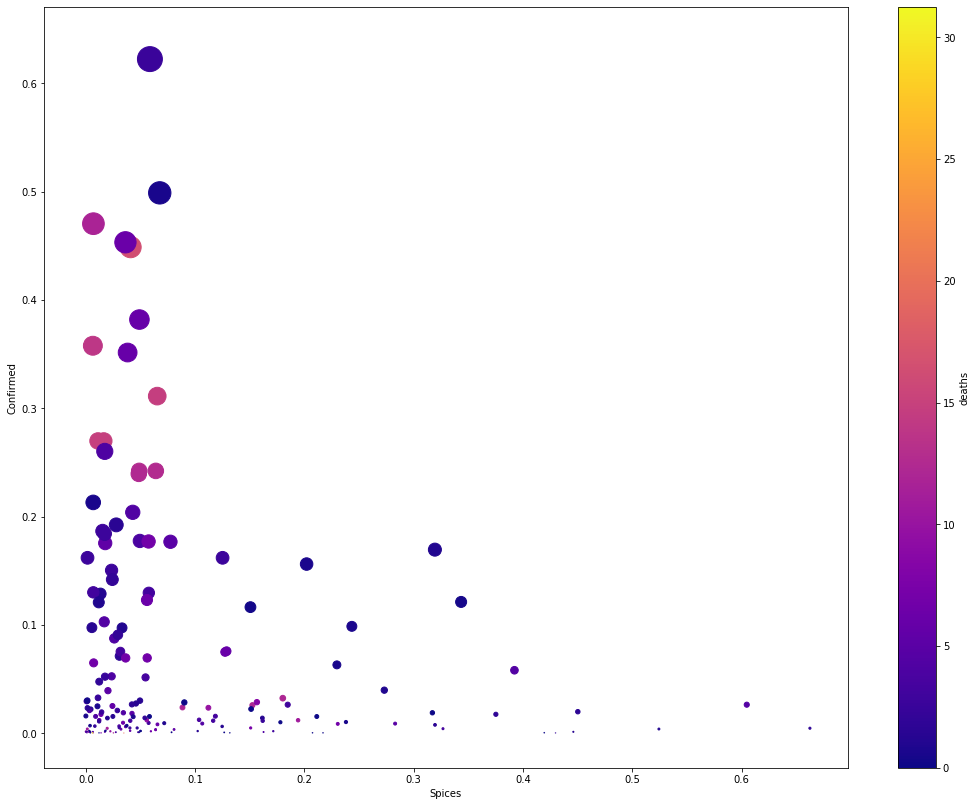

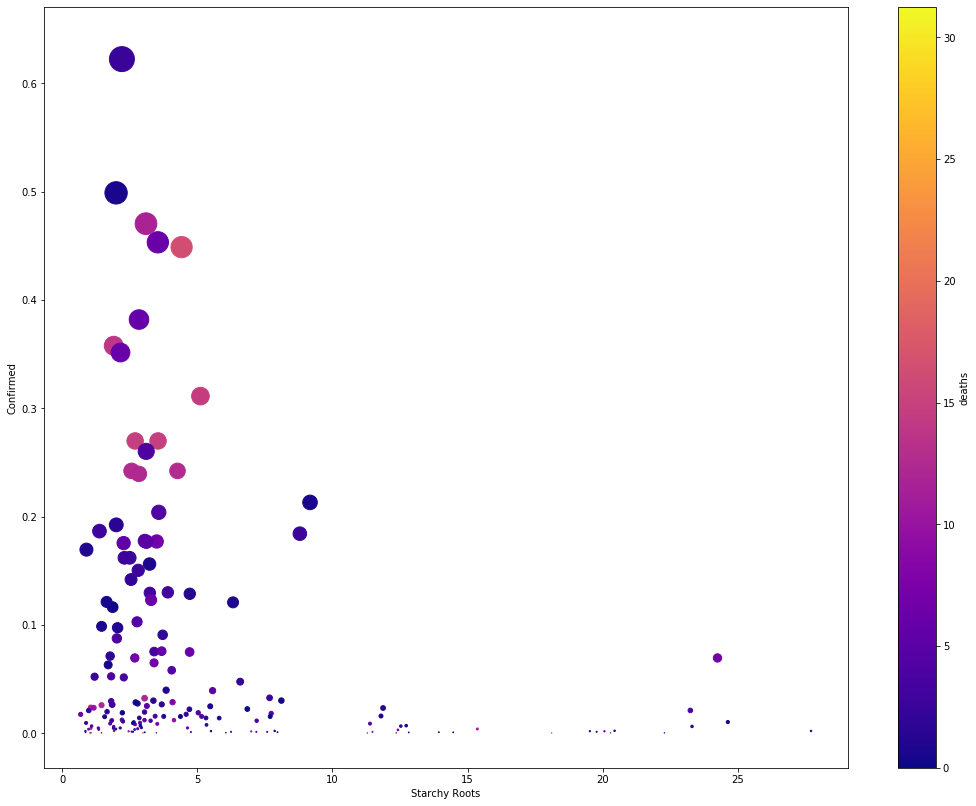

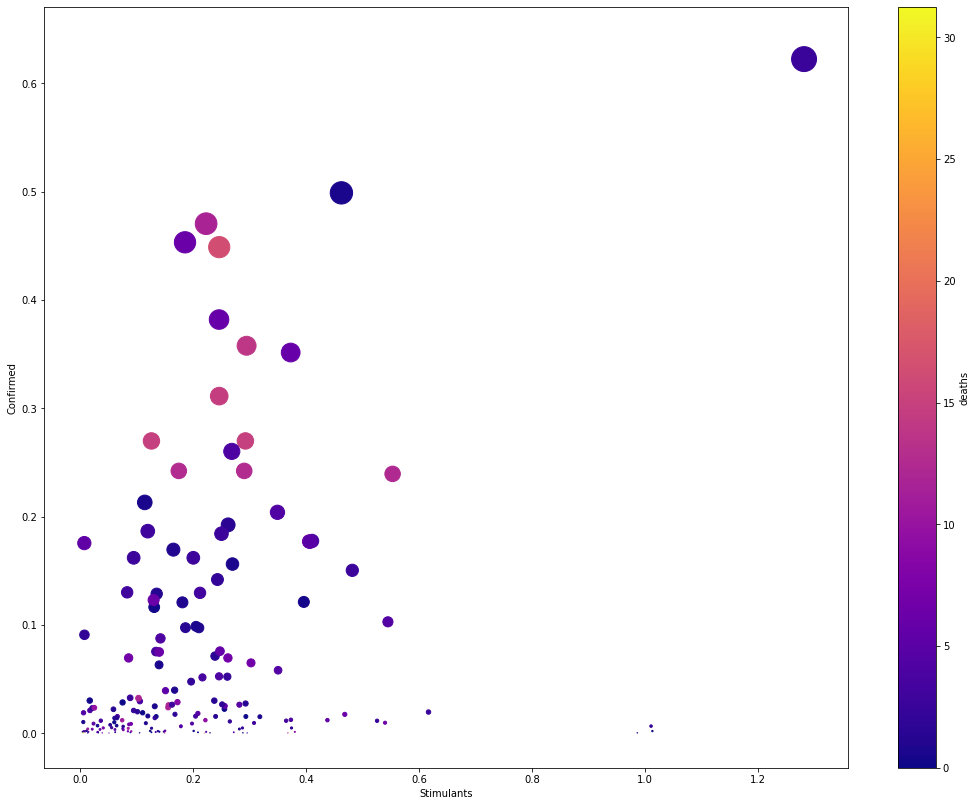

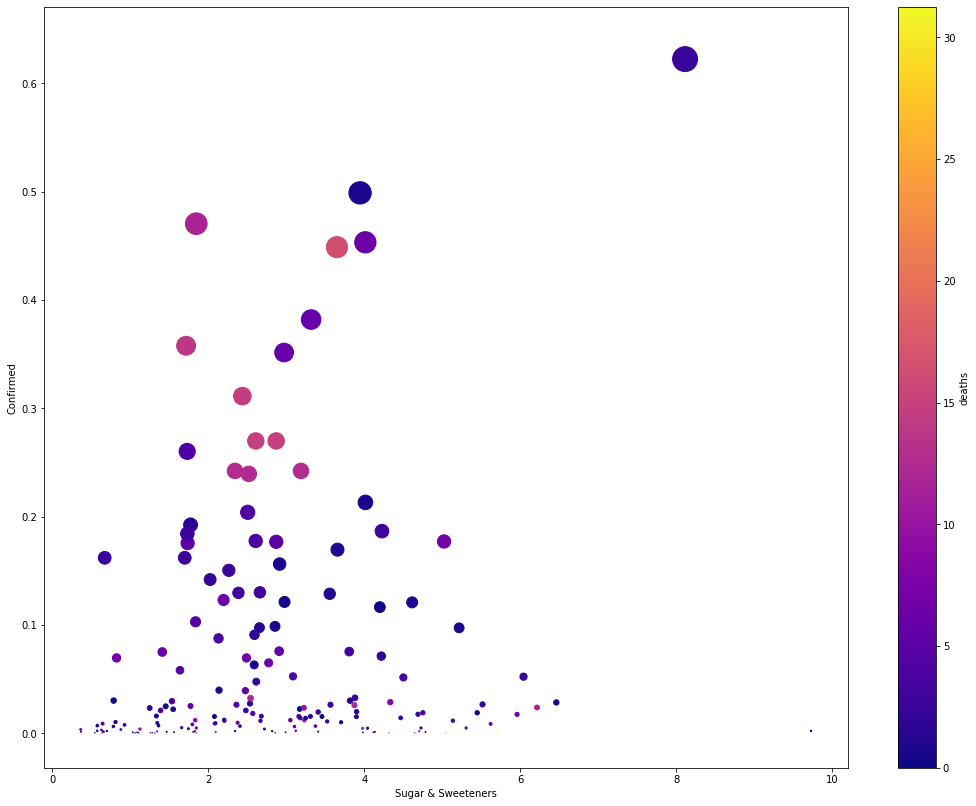

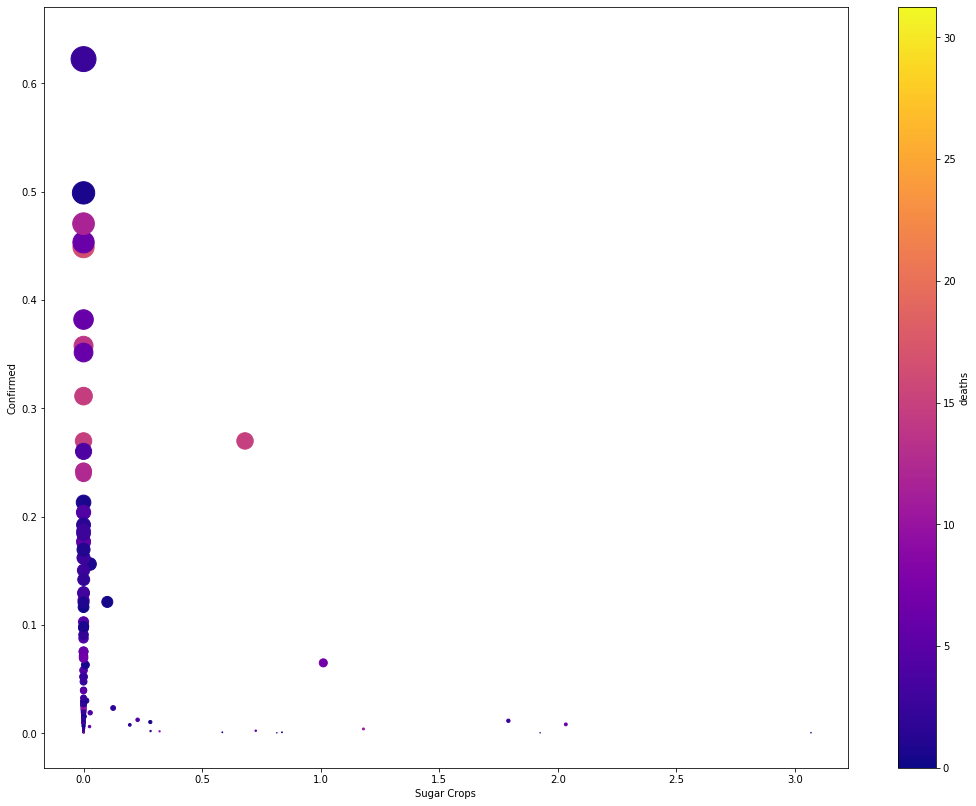

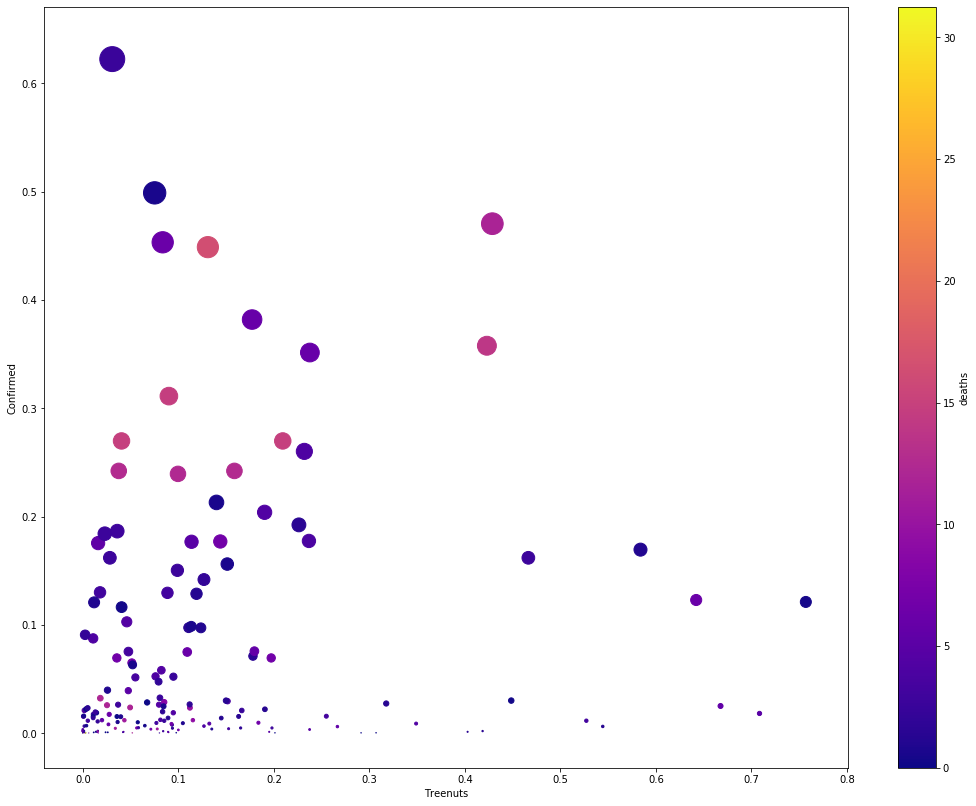

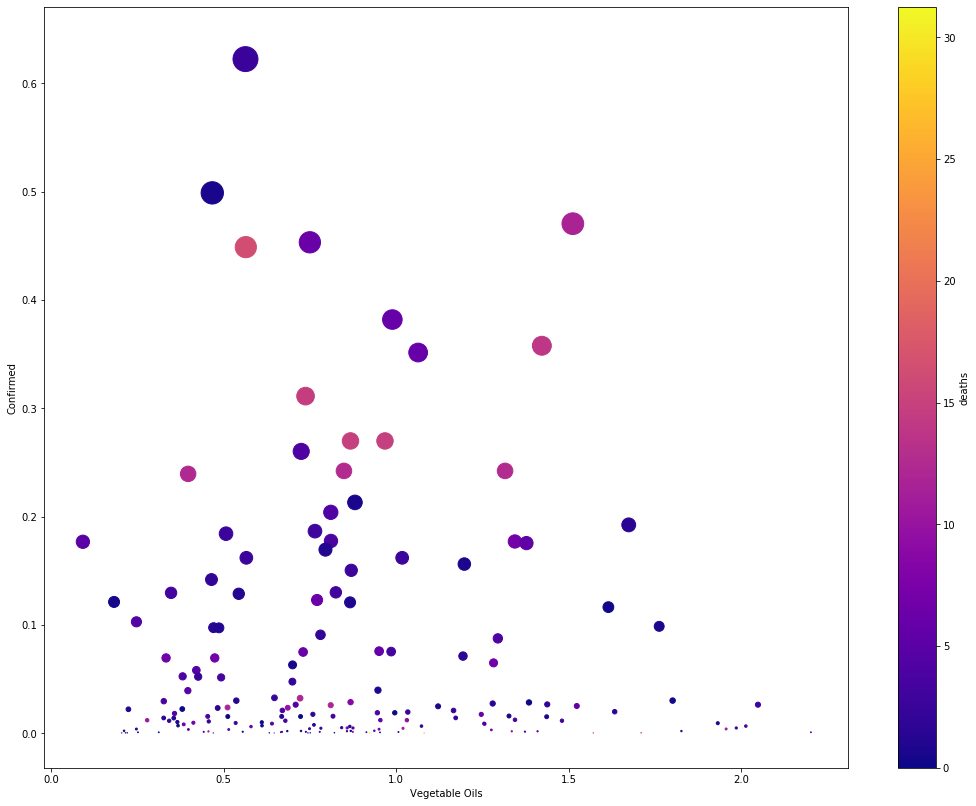

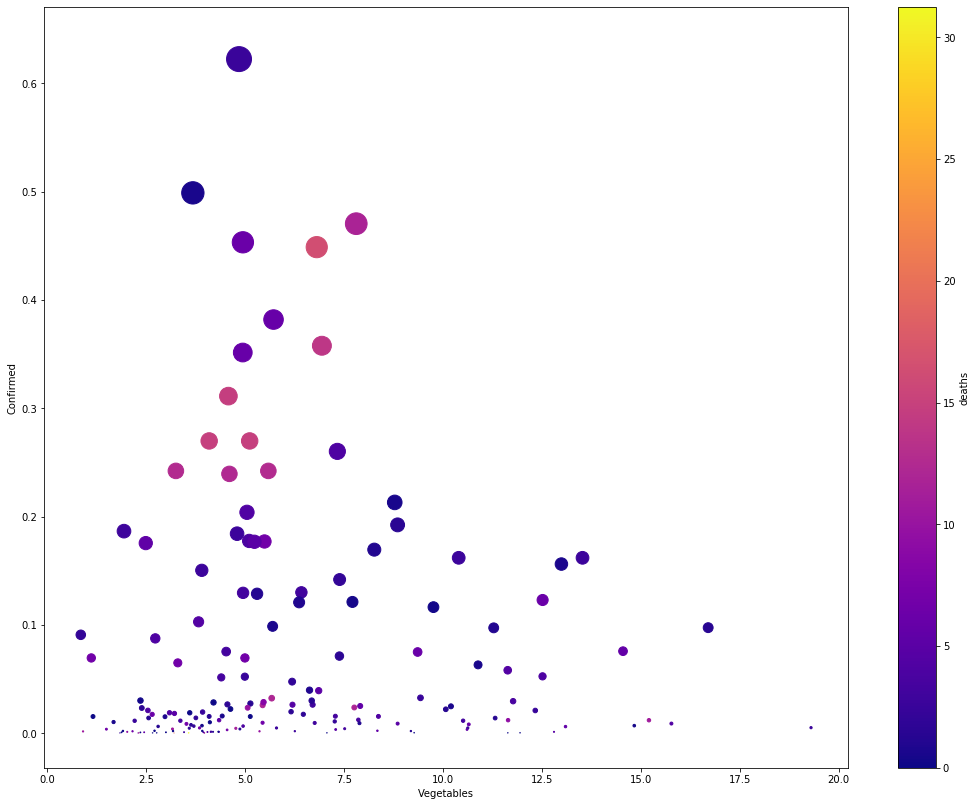

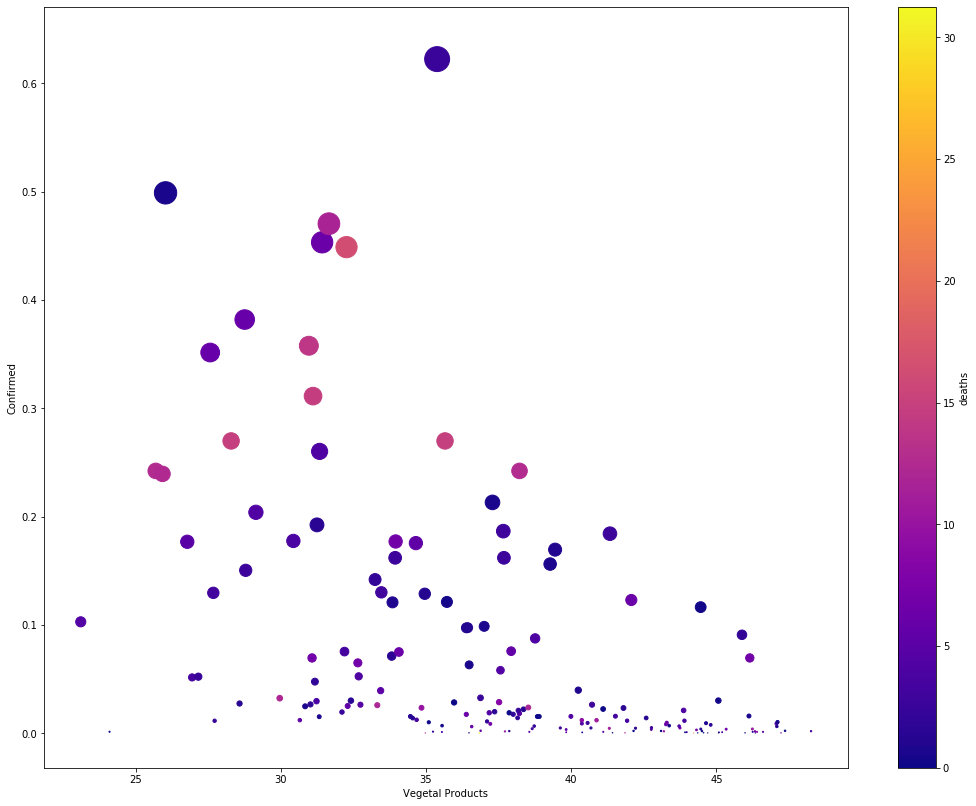

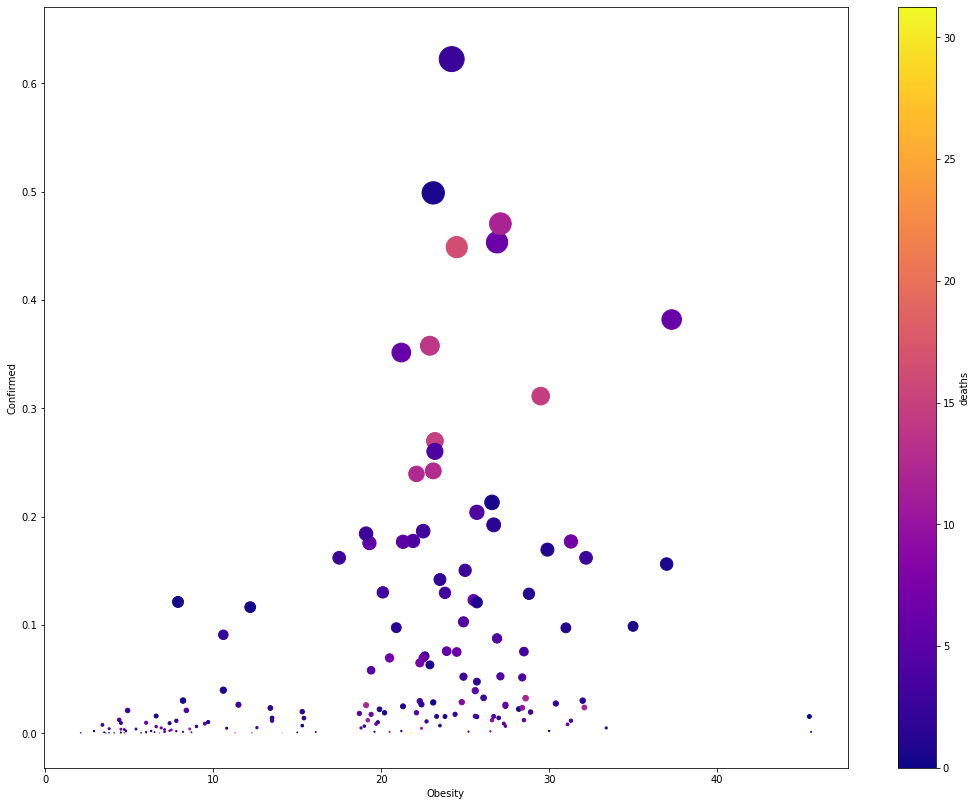

In [38]:
data["recovered"] = (data["Recovered"]/data["Confirmed"])*100
data["deaths"] = (data["Deaths"]/data["Confirmed"])*100
data["active"] = (data["Active"]/data["Confirmed"])*100

for y_data in X_data:
    
    fig, ax = plt.subplots()
    data.plot(kind='scatter', x=y_data, y='Confirmed', s=data["Confirmed"]*1000, c='deaths', cmap='plasma', figsize=(18,14), ax=ax) 
    plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Libraries for tarining and validatinf
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [40]:
X = data[['Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity']]



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import utils

In [42]:
from sklearn import preprocessing

X = preprocessing.scale(X)
print(X)

[[-1.27211911 -0.08563905 -0.47088002 ...  0.19108516  0.47117988
  -1.4973339 ]
 [-0.56881766 -0.30763324  1.12872019 ...  1.60279725 -1.12830176
   0.36978292]
 [-1.15857202 -0.69504194 -0.43672638 ...  1.56704736  0.4370109
   0.82082799]
 ...
 [-1.25738367 -0.63593959 -1.09580766 ... -0.80920741  1.09631449
  -0.49034955]
 [ 1.1422194  -0.49791398 -1.05599887 ... -0.73838375  1.0562679
  -1.28754549]
 [ 0.43458153 -0.52458211 -0.69112215 ... -1.06055532  0.69190735
  -0.67915911]]


In [43]:
Y = preprocessing.scale(Y)
print(Y)

[-0.52979185 -0.34773138 -0.50648546 -0.61360872 -0.38114398 -0.50636483
  0.26748546 -0.36714176  0.99300848 -0.41542457 -0.40037643 -0.5458671
 -0.35579227  1.31542689  3.45115927 -0.5746764  -0.60389842 -0.45027295
 -0.08889744 -0.60551918 -0.02702032 -0.37707585 -0.58183277 -0.25554507
 -0.60794243 -0.53527264  0.9884711  -0.59669859 -0.60062725  0.55090215
 -0.56022675 -0.44457784 -0.42489544 -0.47767376 -0.55886108 -0.1398676
 -0.47493404  0.02969351  0.06726585  0.98605506  0.43924114 -0.41331544
  0.17765909  0.97498071 -0.5416563  -0.51708487  0.55877417 -0.48817167
 -0.6131026  -0.59636424  0.31628643  1.82965659  1.82965659 -0.40480328
 -0.60770114 -0.47524604  1.23254812 -0.52216562 -0.38791623 -0.44477343
 -0.57177164 -0.47175551 -0.34270491 -0.50703854 -0.60426985 -0.45800863
 -0.32254129  3.90526451 -0.57796719 -0.57152393  0.49890559 -0.55603722
  3.49156623  1.12746184  2.62613857 -0.45736334 -0.50351953 -0.5717728
 -0.39055978 -0.60418632 -0.60418632 -0.60418632 -0.42

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [45]:
lab_enc = preprocessing.LabelEncoder()
Y_test = lab_enc.fit_transform(Y_test)
print(Y_test)
print(utils.multiclass.type_of_target(Y_test))
print(utils.multiclass.type_of_target(Y_test.astype('int')))
print(utils.multiclass.type_of_target(Y_test))

[ 0 50  5 35 14 18  2 49 47 43 15 29 11  3  6 46 10  8 37 17 40 48 30 25
 13 38 33  7 34  4 39 45 19  1 24 31 27 41 21 26 44  9 42 20 16 23 22 36
 28 32 12]
multiclass
multiclass
multiclass


In [46]:
lab_enc = preprocessing.LabelEncoder()
Y_train = lab_enc.fit_transform(Y_train)
print(Y_train)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
print(utils.multiclass.type_of_target(Y_train))

[ 97  72  19  31  16   3  53  74   9  59  12   6  91 104  76  46 103  55
  25  98  60   0  18  68  50  92  90  87  34  42  11  32  58  54  61  86
  93  75 109  94  79  84 102   7  67  36  63  97  83  96  85   4  21  66
  77  56 113  64  38   7  47  23  20  48   2   5 107  39  13  30  62  65
  81 105  14 106 100  51  99  10   1  24  22  53 110  35  43  95 101  33
  71  73  45  27  57  49  70   8 112  78  26  29  89  28  81 108  15  80
  40  41  37  44  17  14  88  69 111  52  82]
multiclass
multiclass
multiclass


In [47]:
Y_train = preprocessing.scale(Y_train)
Y_test = preprocessing.scale(Y_test)
print(Y_test)

[-1.69841555  1.69841555 -1.35873244  0.67936622 -0.74730284 -0.47555635
 -1.56254231  1.63047893  1.49460569  1.2228592  -0.67936622  0.27174649
 -0.95111271 -1.49460569 -1.29079582  1.42666906 -1.01904933 -1.15492257
  0.81523946 -0.54349298  1.01904933  1.56254231  0.33968311  0.
 -0.81523946  0.88317609  0.54349298 -1.2228592   0.6114296  -1.42666906
  0.95111271  1.35873244 -0.40761973 -1.63047893 -0.06793662  0.40761973
  0.13587324  1.08698595 -0.27174649  0.06793662  1.29079582 -1.08698595
  1.15492257 -0.33968311 -0.6114296  -0.13587324 -0.20380987  0.74730284
  0.20380987  0.47555635 -0.88317609]


In [49]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.externals import joblib

algorithms = []
algorithms.append(('LinearRegression', LinearRegression()))
# algorithms.append(('KNeighbours',LogisticRegression()))
algorithms.append(('BaggingRegressor', BaggingRegressor()))
algorithms.append(('RandomForest', RandomForestRegressor()))
algorithms.append(('KNeighbours', KNeighborsRegressor()))

algorithms.append(('Boosting',XGBClassifier()))


# Evaluations
results = []
names = []

for name,model in algorithms:
    
#     Fit data to the model
    model.fit(X_train,Y_train)
    
#     PRedict data
    predictions = model.predict(X_test)
    
#     GEt Varice
    variance = explained_variance_score(Y_test, predictions)
    accu= r2_score(Y_test,predictions)
#     Get mean absolute error
    meanError = mean_absolute_error(predictions, Y_test)
    results.append(meanError)
    names.append(name) 
#     Display result
    result = "%s: %f (%f) " % (name,variance, meanError)
    print (accu)
    print(result)
    modelName=name+".pkl"
    joblib.dump(model,modelName) 
    
    print("----------------------------")

0.4307490594977037
LinearRegression: 0.430820 (0.580474) 
----------------------------
0.637018496114744
BaggingRegressor: 0.641544 (0.492722) 
----------------------------
0.5657346338096887
RandomForest: 0.585857 (0.527440) 
----------------------------
0.38980356526992443
KNeighbours: 0.436957 (0.593057) 
----------------------------
0.03791293630906589
Boosting: 0.113897 (0.734124) 
----------------------------


In [21]:
from sklearn.ensemble import GradientBoostingClassifier

lab_enc = preprocessing.LabelEncoder()
Y_train = lab_enc.fit_transform(Y_train)

print(Y_train)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
print(utils.multiclass.type_of_target(Y_train))

lab_enc = preprocessing.LabelEncoder()
Y_test = lab_enc.fit_transform(Y_test)
print(Y_test)
print(utils.multiclass.type_of_target(Y_test))
print(utils.multiclass.type_of_target(Y_test.astype('int')))
print(utils.multiclass.type_of_target(Y_test))

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)
    
    predictions = gb_clf.predict(X_test)
    accu= r2_score(Y_test,predictions)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print(accu)
   


[ 97  72  19  31  16   3  53  74   9  59  12   6  91 104  76  46 103  55
  25  98  60   0  18  68  50  92  90  87  34  42  11  32  58  54  61  86
  93  75 109  94  79  84 102   7  67  36  63  97  83  96  85   4  21  66
  77  56 113  64  38   7  47  23  20  48   2   5 107  39  13  30  62  65
  81 105  14 106 100  51  99  10   1  24  22  53 110  35  43  95 101  33
  71  73  45  27  57  49  70   8 112  78  26  29  89  28  81 108  15  80
  40  41  37  44  17  14  88  69 111  52  82]
multiclass
multiclass
multiclass
[ 0 50  5 35 14 18  2 49 47 43 15 29 11  3  6 46 10  8 37 17 40 48 30 25
 13 38 33  7 34  4 39 45 19  1 24 31 27 41 21 26 44  9 42 20 16 23 22 36
 28 32 12]
multiclass
multiclass
multiclass
Learning rate:  0.05
Accuracy score (training): 1.000
-10.108506787330317
Learning rate:  0.075
Accuracy score (training): 1.000
-8.87737556561086
Learning rate:  0.1
Accuracy score (training): 1.000
-9.065882352941177
Learning rate:  0.25
Accuracy score (training): 0.160
-9.53239819004525
Le

In [22]:
lab_enc = preprocessing.LabelEncoder()
Y_train = lab_enc.fit_transform(Y_train)

print(Y_train)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
print(utils.multiclass.type_of_target(Y_train))

[ 97  72  19  31  16   3  53  74   9  59  12   6  91 104  76  46 103  55
  25  98  60   0  18  68  50  92  90  87  34  42  11  32  58  54  61  86
  93  75 109  94  79  84 102   7  67  36  63  97  83  96  85   4  21  66
  77  56 113  64  38   7  47  23  20  48   2   5 107  39  13  30  62  65
  81 105  14 106 100  51  99  10   1  24  22  53 110  35  43  95 101  33
  71  73  45  27  57  49  70   8 112  78  26  29  89  28  81 108  15  80
  40  41  37  44  17  14  88  69 111  52  82]
multiclass
multiclass
multiclass


In [23]:
lab_enc = preprocessing.LabelEncoder()
Y_test = lab_enc.fit_transform(Y_test)
print(Y_test)
print(utils.multiclass.type_of_target(Y_test))
print(utils.multiclass.type_of_target(Y_test.astype('int')))
print(utils.multiclass.type_of_target(Y_test))

[ 0 50  5 35 14 18  2 49 47 43 15 29 11  3  6 46 10  8 37 17 40 48 30 25
 13 38 33  7 34  4 39 45 19  1 24 31 27 41 21 26 44  9 42 20 16 23 22 36
 28 32 12]
multiclass
multiclass
multiclass


In [24]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)
print("LogisticRegression")

Y_pred=clf.predict(X_test)

LogisticRegression


In [25]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", r2_score(Y_test,Y_pred))

Accuracy: -7.718371040723982


In [26]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=180)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, Y_train)

Y_pred=clf.predict(X_test)

In [27]:
print("Accuracy:",r2_score(Y_test,Y_pred))

Accuracy: -9.71393665158371
